In [137]:
%matplotlib inline

import os
import utils
import re
import nltk
import json
import gensim
import utils
import dateutil
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from utils import metrics
# import advertools as adv
from scipy import sparse
from functools import reduce
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import Image
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from textblob import TextBlob
from functools import reduce
from nltk.corpus import stopwords
from typing import List, Callable, Dict
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score
sns.set(style="ticks", color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from utils import hyperparameterTuning_RandomForest
from utils import hyperparameterTuning_XGBoost
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import featureScore
from utils import folderPath
from utils import metrics
from utils import removeColumnContainString
from utils import Feature_Extraction
from utils import Normalizing
import sys

random_state=2022

In [138]:
figurePath=utils.folderPath('SavedFigures')
datasetePath=utils.folderPath('Dataset')  

1
1


In [139]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
dataset1='/content/drive/MyDrive/NLP/'

In [141]:
extracted=pd.read_csv(dataset1 + '3.csv')

In [142]:
extracted

,Unnamed: 0,Unnamed: 0.1,caption,following,likes,posts_count,followers,INDUSTRY_cosmetics,INDUSTRY_hospitality,Hod,...,TextBlob_Polarity,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,caption_length,hashtag_popularity
0,0,0,possible thanks lateral flow testing fast simp...,964.0,14.0,47.0,1093.0,1,0,10,...,0.282576,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,NaN,0,"['⏱', '📄', '🧑🏻\u200d⚕️', '👨\u200d👩\u200d👧\u200...","'stopwatch', 'page facing up', 'health worker:...",10,860,3219.750000
1,1,1,grateful kind words feedback receiving since s...,964.0,12.0,47.0,1093.0,1,0,14,...,0.168056,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,NaN,0,"['👏', '🧡']","'clapping hands', 'orange heart'",2,716,5178.333333
2,2,2,hand dived isle jura scallop smoked roe leek c...,308.0,100.0,343.0,4202.0,0,1,17,...,0.000000,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,NaN,0,[],NaN,0,425,17663.680000
3,3,3,jerusalem artichoke prepared first dessert mal...,308.0,81.0,343.0,4202.0,0,1,20,...,0.250000,"'#michelin', '#michelinstar', '#michelinuk', '...",28,NaN,0,[],NaN,0,490,16841.857143
4,4,4,main course seasonal 7 course menu borders roe...,308.0,146.0,343.0,4202.0,0,1,18,...,0.166667,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],NaN,0,530,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,41736,41736,alongside hospitality performing arts also mas...,599.0,4079.0,1933.0,167394.0,0,1,17,...,0.428030,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],NaN,0,878,153640.333333
41737,41737,41737,isnt looking forward waking beautiful nights s...,599.0,1621.0,1933.0,167394.0,0,1,14,...,0.491667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],'bottle with popping cork',1,532,81714.428571
41738,41738,41738,missing london town heres shot really showcase...,599.0,1548.0,1933.0,167394.0,0,1,12,...,0.260417,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],NaN,0,479,102699.125000
41739,41739,41739,closed going try keep happy inspired mix beaut...,599.0,2637.0,1933.0,167394.0,0,1,13,...,0.445833,"'#lookingforward', '#travelinspo', '#datenight...",7,NaN,0,[],NaN,0,643,70165.571429


In [143]:
extracted.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [144]:
extracted=extracted.astype(str)

In [145]:
tfidf_caption=Feature_Extraction(extracted['caption'],4,TfidfVectorizer)
tfidf_caption
print("\n\n\n")
tfidf_hashtags=Feature_Extraction(extracted['hashtags'],3,TfidfVectorizer)
tfidf_hashtags
print("\n\n\n")
tfidf_emoji_text=Feature_Extraction(extracted['emoji_text'],3,TfidfVectorizer)
tfidf_emoji_text
print("\n\n\n")
tfidf_mentions=Feature_Extraction(extracted['mentions'],3,TfidfVectorizer)
tfidf_mentions
print("\n\n\n")
tfidf_dataset = pd.DataFrame(np.hstack((tfidf_caption,tfidf_hashtags,tfidf_emoji_text,tfidf_mentions,extracted)))
tfidf_dataset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


always amazing available beautiful chocolate christmas coffee consultation delicious enjoy every experience favourite first friday great happy little london looking lovely online order patient patients people perfect please procedure results share special start sunday surgery thank today treatment visit website weekend would years youre






/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


abdominoplasty aesthetic aestheticmedicine aesthetics antiageing antiaging bakery beauty beforeandafter blepharoplasty botox boutiquehotel bread breakfast breastaugmentation breastimplants breastlift breastreduction breastsurgeon breastsurgery brunch cake christmas cocktails coffee coffeeshop confidence cosmetic cosmeticsurgeon cosmeticsurgery delicious dermalfiller dermalfillers doctor edinburgh edinburghfood edinburghfoodie edinburghlife facelift fillers finedining food foodie foodphotography foodporn harleystreet hotel injectables instafood instagood juvederm lipfiller lipfillers lipo liposuction london londonfood londonhotel londonlife londonplasticsurgeon love lunch luxury luxuryhotel mayfair michelin mommymakeover nonsurgical nosejob pastry plasticsurgeon plasticsurgery plasticsurgerylondon restaurant rhinoplasty rhinoplastylondon richmond richmonduponthames scotland shoplocal skincare sourdough staycation supportlocal surgeon surgery surrey teddington transformation travel trave

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


arrow backhand beer beverage black blossom blue button camera check cherry christmas clapping clinking cocktail collision dizzy down drooling exclamation eyes face fire flag flash folded food fork glass glasses globe glowing green grinning hamburger hand hands health heart hearts index keycap kingdom kiss knife laptop leaf left light mail mark medium mobile orange party partying person phone pizza pointing popper pushpin raising receiver registered right round savoring showing skin small smiling sparkles square star struck syringe telephone thumbs tone tree united white wine winking with woman worker yellow






/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


108marylebonelane 40ftbrewery aberdeensurgeon aestheticsjournaluk aibeautyclinic alessandro_palazzi asap barchrichmond binghamriverhouse blackswan_oldstead bristol_beacon cazcabeltequila chelseyredwood ciaralawless1 cosmeticsurgeonslondon curiocollection deepaestheticss deliveroo derma_medical draayoubi drdominicbray drjonathanroos drkalpnapindolia drmaryamzamani drnirdosh drrachna_murthy drsomji_skin drtedmiln endureskincare eyelidsurgerylondon facerestorationlondon farrello_samanta fernandatakebe fessh_europe foodstorymedialtd fushiwellbeing gildedballoon hair_by_tash_tsangaris harbour_hotels harbourhotels harley_academy harrietlangford heckfieldhomefarm home johnniewalker jre_jeunesrestaurateurs jre_uk_ireland justeatuk justindesouza_photographer justsabrinagali juvederm kennethculhane langham_london lanserhof_arts_club lecochonaveugle london majestic_aesthetics_clinic majestic_aesthetics_official mama_bross manhattancoffeeroasters mark_anthony_fox michelinguide milesberrysurgeon mi

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2825757575757575,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,nan,0,"['⏱', '📄', '🧑🏻\u200d⚕️', '👨\u200d👩\u200d👧\u200...","'stopwatch', 'page facing up', 'health worker:...",10,860,3219.75
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1680555555555555,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,nan,0,"['👏', '🧡']","'clapping hands', 'orange heart'",2,716,5178.333333333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,nan,0,[],nan,0,425,17663.68
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,nan,0,[],nan,0,490,16841.85714285714
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1666666666666666,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],nan,0,530,16841.85714285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.428030303030303,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],nan,0,878,153640.33333333334
41737,0.0,0.0,0.0,0.335284,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4916666666666667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],'bottle with popping cork',1,532,81714.42857142857
41738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.511659,...,0.2604166666666666,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],nan,0,479,102699.125
41739,0.0,0.0,0.0,0.444714,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4458333333333333,"'#lookingforward', '#travelinspo', '#datenight...",7,nan,0,[],nan,0,643,70165.57142857143


In [146]:
tfidf_dataset[331]

0          14.0
1          12.0
2         100.0
3          81.0
4         146.0
          ...  
41736    4079.0
41737    1621.0
41738    1548.0
41739    2637.0
41740    5551.0
Name: 331, Length: 41741, dtype: object

In [147]:
print(len(tfidf_dataset.columns))
a=len(tfidf_dataset.columns)-25+1
print(a)

355
331


In [148]:
tfidf_dataset[a]

0          14.0
1          12.0
2         100.0
3          81.0
4         146.0
          ...  
41736    4079.0
41737    1621.0
41738    1548.0
41739    2637.0
41740    5551.0
Name: 331, Length: 41741, dtype: object

In [149]:
tfidf_dataset.rename(columns = {a:'likes'}, inplace = True)

In [150]:
tfidf_dataset

,0,1,2,3,4,5,6,7,8,9,...,345,346,347,348,349,350,351,352,353,354
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2825757575757575,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,nan,0,"['⏱', '📄', '🧑🏻\u200d⚕️', '👨\u200d👩\u200d👧\u200...","'stopwatch', 'page facing up', 'health worker:...",10,860,3219.75
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1680555555555555,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,nan,0,"['👏', '🧡']","'clapping hands', 'orange heart'",2,716,5178.333333333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,nan,0,[],nan,0,425,17663.68
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,"'#michelin', '#michelinstar', '#michelinuk', '...",28,nan,0,[],nan,0,490,16841.85714285714
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.1666666666666666,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],nan,0,530,16841.85714285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.428030303030303,"'#lookingforward', '#theatreland', '#performin...",6,"'@evening', '@tiktok', '@nationalyouththeatre'...",4,[],nan,0,878,153640.33333333334
41737,0.0,0.0,0.0,0.335284,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4916666666666667,"'#lookingforward', '#travelinspiration', '#lov...",7,'@youmustgoblog',1,['🍾'],'bottle with popping cork',1,532,81714.42857142857
41738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.511659,...,0.2604166666666666,"'#lookingforward', '#londonviews', '#prettycit...",8,'@damienhewetson',1,[],nan,0,479,102699.125
41739,0.0,0.0,0.0,0.444714,0.0,0.0,0.0,0.0,0.0,0.0,...,0.4458333333333333,"'#lookingforward', '#travelinspo', '#datenight...",7,nan,0,[],nan,0,643,70165.57142857143


In [151]:
df=removeColumnContainString(tfidf_dataset)

Couldn't covert 329 to float
Couldn't covert 346 to float
Couldn't covert 348 to float
Couldn't covert 350 to float
Couldn't covert 351 to float


In [152]:
df = pd.DataFrame(df)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
tfidf_normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [153]:
dropped = [14,20,26,28,31,32,33,34,49,51,52,54,55,56]
tfidf_normalized_df = tfidf_normalized_df.drop(dropped,axis=1)
tfidf_normalized_df

,0,1,2,3,4,5,6,7,8,9,...,341,342,343,344,345,347,349,352,353,354
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.632390,0.641288,0.166667,0.000000,0.192308,0.390632,0.005571
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.405556,0.584028,0.187500,0.000000,0.038462,0.325148,0.008959
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.000000,0.500000,0.520833,0.000000,0.000000,0.192815,0.030561
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.333333,0.625000,0.583333,0.000000,0.000000,0.222374,0.029139
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.333333,0.583333,0.583333,0.057143,0.000000,0.240564,0.029139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.0,0.0,0.506629,0.714015,0.125000,0.114286,0.000000,0.398818,0.265825
41737,0.0,0.0,0.0,0.335284,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.416667,0.745833,0.145833,0.028571,0.019231,0.241473,0.141381
41738,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.511659,...,0.0,0.0,0.0,0.510417,0.630208,0.166667,0.028571,0.000000,0.217372,0.177688
41739,0.0,0.0,0.0,0.444714,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.708333,0.722917,0.145833,0.000000,0.000000,0.291951,0.121399


In [154]:
y=tfidf_normalized_df['likes']                #Target Variable 
X = tfidf_normalized_df.drop('likes', axis=1) #Feature Matrix 

In [155]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size=0.2, random_state=2022)

## XGBOOST

In [156]:
# hyperparameterTuning_XGBoost(x_train_tfidf,y_train_tfidf)

In [157]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7,random_state=random_state)
xg_reg.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = xg_reg.predict(x_test_tfidf)

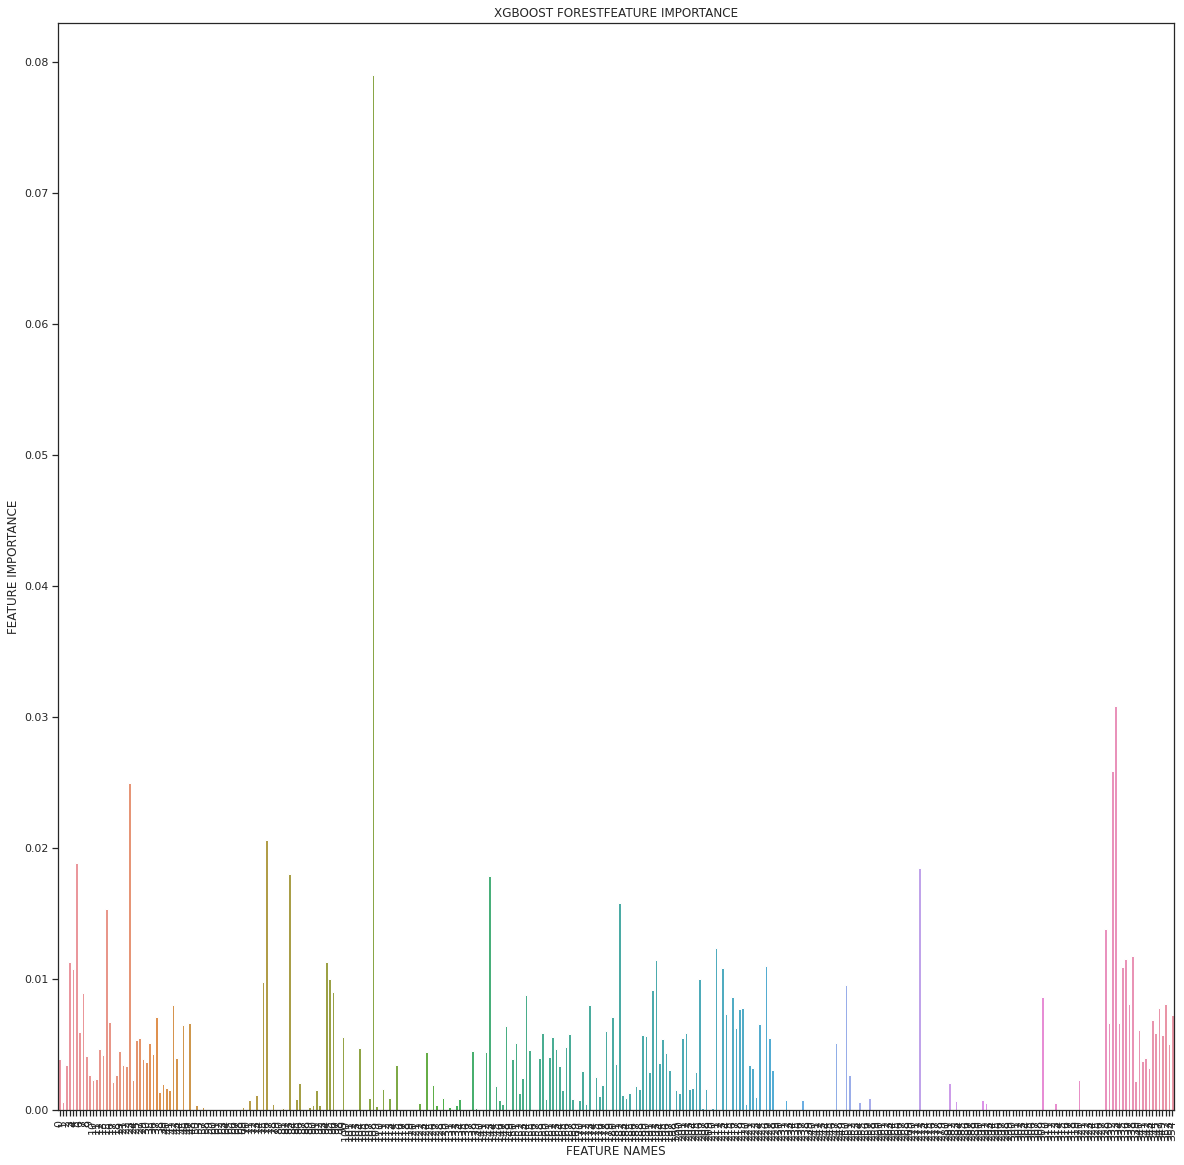

In [158]:
plot_feature_importance(xg_reg.feature_importances_,x_train_tfidf.columns,'XGBOOST FOREST')

In [159]:
featureScore(xg_reg.feature_importances_)

Feature: 0, Score: 0.00395
Feature: 1, Score: 0.00065
Feature: 2, Score: 0.00344
Feature: 3, Score: 0.01132
Feature: 4, Score: 0.01079
Feature: 5, Score: 0.01890
Feature: 6, Score: 0.00597
Feature: 7, Score: 0.00891
Feature: 8, Score: 0.00411
Feature: 9, Score: 0.00269
Feature: 10, Score: 0.00228
Feature: 11, Score: 0.00241
Feature: 12, Score: 0.00471
Feature: 13, Score: 0.00422
Feature: 14, Score: 0.01539
Feature: 15, Score: 0.00677
Feature: 16, Score: 0.00217
Feature: 17, Score: 0.00272
Feature: 18, Score: 0.00450
Feature: 19, Score: 0.00348
Feature: 20, Score: 0.00335
Feature: 21, Score: 0.02500
Feature: 22, Score: 0.00233
Feature: 23, Score: 0.00538
Feature: 24, Score: 0.00555
Feature: 25, Score: 0.00394
Feature: 26, Score: 0.00366
Feature: 27, Score: 0.00516
Feature: 28, Score: 0.00426
Feature: 29, Score: 0.00714
Feature: 30, Score: 0.00142
Feature: 31, Score: 0.00201
Feature: 32, Score: 0.00167
Feature: 33, Score: 0.00154
Feature: 34, Score: 0.00805
Feature: 35, Score: 0.00399
Fe

In [160]:
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}

rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_tfidf,y_pred_tfidf)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## Random Forest

In [161]:
# hyperparameterTuning_RandomForest(x_train_tfidf,y_train_tfidf)

In [162]:
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = rnd_clf.predict(x_test_tfidf)


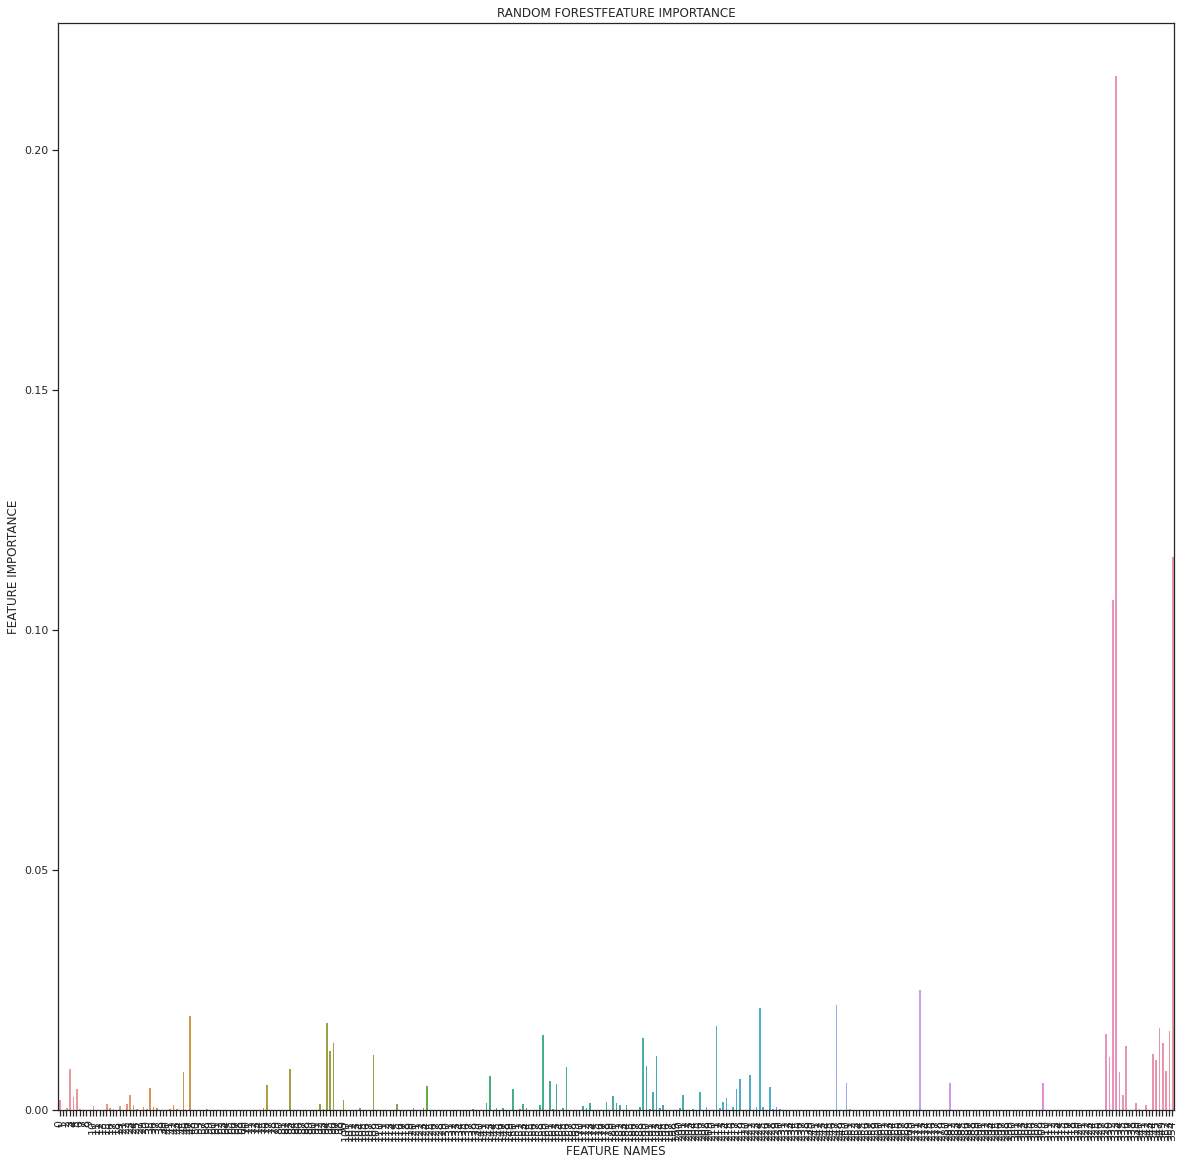

In [163]:
plot_feature_importance(rnd_clf.feature_importances_,x_train_tfidf.columns,'RANDOM FOREST')

In [164]:
featureScore(rnd_clf.feature_importances_)

Feature: 0, Score: 0.00243
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.00061
Feature: 3, Score: 0.00876
Feature: 4, Score: 0.00295
Feature: 5, Score: 0.00474
Feature: 6, Score: 0.00042
Feature: 7, Score: 0.00005
Feature: 8, Score: 0.00011
Feature: 9, Score: 0.00007
Feature: 10, Score: 0.00116
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00009
Feature: 13, Score: 0.00014
Feature: 14, Score: 0.00149
Feature: 15, Score: 0.00074
Feature: 16, Score: 0.00040
Feature: 17, Score: 0.00029
Feature: 18, Score: 0.00102
Feature: 19, Score: 0.00031
Feature: 20, Score: 0.00148
Feature: 21, Score: 0.00340
Feature: 22, Score: 0.00121
Feature: 23, Score: 0.00055
Feature: 24, Score: 0.00030
Feature: 25, Score: 0.00082
Feature: 26, Score: 0.00050
Feature: 27, Score: 0.00489
Feature: 28, Score: 0.00089
Feature: 29, Score: 0.00069
Feature: 30, Score: 0.00026
Feature: 31, Score: 0.00012
Feature: 32, Score: 0.00006
Feature: 33, Score: 0.00045
Feature: 34, Score: 0.00130
Feature: 35, Score: 0.00047
Fe

In [165]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_tfidf,y_pred_tfidf)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## MLP

In [166]:
# hyperparameterTuning_MLP(x_train_tfidf,y_train_tfidf)

In [167]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam',random_state=random_state)
mlp_GS.fit(x_train_tfidf, y_train_tfidf)
y_pred_mlp = mlp_GS.predict(x_test_tfidf)

In [168]:

rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_tfidf,y_pred_mlp)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

## SVC

In [169]:
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0,random_state=random_state)
svr.fit(x_train_tfidf, y_train_tfidf)
y_pred_SVR = svr.predict(x_test_tfidf)

In [170]:
metrics(y_test_tfidf,y_pred_SVR)

(0.04374068596022533,
 -0.11321826484971043,
 0.013949340494798073,
 0.0019132476082710534,
 -3.129476581181011,
 0.9200441268166338)

In [171]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test_tfidf,y_pred_SVR)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [172]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,XGboost,0.030213,0.468859,0.008778,-3.499468,0.653835
1,Random Forest,0.034835,0.293958,0.012091,-3.357144,0.671963
2,MLP,0.033458,0.348661,0.010599,-3.397467,0.807857
3,MLP,0.043741,-0.113218,0.013949,-3.129477,0.920044
